# Mineração de imagens

Aluna: Ana Letícia Garcez Vicente

nº USP: 10746842

# 2.1 Identificação do Problema

O diagnóstico precoce e preciso da doença de Alzheimer é fundamental para a implementação de intervenções terapêuticas eficazes e o planejamento adequado do tratamento. No entanto, essa tarefa é frequentemente desafiadora. Uma das abordagens valiosas no diagnóstico do Alzheimer envolve o uso de técnicas de imagem, como a Ressonância Magnética (MRI).

A Ressonância Magnética é uma tecnologia de imagem médica que utiliza campos magnéticos e ondas de rádio para criar imagens detalhadas das estruturas internas do corpo humano. O que permite capturar alterações anatômicas relacionadas com a progessão do Alzheimer.

O dataset utilizado neste estudo consiste em imagens de Ressonância Magnética (MRI) com resolução de 128x128 pixels, contendo quatro grupos distintos de imagens, cada um deles representando diferentes estágios ou condições relacionadas à demência. Esses grupos são definidos da seguinte maneira:

*   Classe 1 - Mild Dementia (896 imagens): estágio inicial de demência leve;
*   Classe 2 - Moderate Dementia (64 imagens): demência moderada;
*   Classe 3 - Non Demented (3200 imagens): não apresentam sinais de demência;
*   Classe 4 - Very Mild Demented (2240 imagens): estágio muito leve de demência.

Devido ao desbalanceamento das classes e com o objetivo de simplicar a análise, este trabalho utilizará apenas as imagens das classes 3 e 4, com o objetivo de classificar através de um algoritmo as imagens entre essas duas classes. Essa abordagem visa aprofundar nossa compreensão das características de imagem que podem estar associadas à ausência ou aos estágios iniciais da demência de Alzheimer, fornecendo informações valiosas para o diagnóstico e a pesquisa nessa área crucial da medicina.


O dataset utilizado foi o [Alzheimer MRI Preprocessed Dataset](https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset/) extraído do Kaggle.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import zipfile

In [2]:
# Download Dataset - Non_demented

!gdown --id 1vEeY_lKwmBHFTtOWUz_LhwZhxTvgEVNh -O non_demented.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vEeY_lKwmBHFTtOWUz_LhwZhxTvgEVNh
To: /content/non_demented.zip
100% 14.7M/14.7M [00:00<00:00, 43.2MB/s]


In [3]:
!unzip non_demented.zip > /dev/null

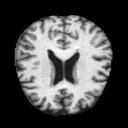

In [4]:
image = io.imread('Non_Demented/non.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

In [5]:
# Download Dataset - Very_mild_demented

!gdown --id 1qSaMavBlmoAsPv3Yn5r7YlAi54zQ1nNK -O very_mild_demented.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qSaMavBlmoAsPv3Yn5r7YlAi54zQ1nNK
To: /content/very_mild_demented.zip
100% 10.4M/10.4M [00:00<00:00, 29.8MB/s]


In [6]:
!unzip very_mild_demented.zip > /dev/null

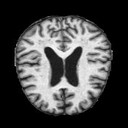

In [7]:
image = io.imread('Very_Mild_Demented/verymild.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

# 2.2 Pré-Processamento

In [8]:
diretorio_classe_A = "Non_Demented"
diretorio_classe_B = "Very_Mild_Demented"

In [9]:
import os
import random

# Pasta que contém as imagens
pasta_imagens = diretorio_classe_A

# Listar todas as imagens na pasta
imagens = os.listdir(pasta_imagens)

numero_desejado = 2240

if len(imagens) > numero_desejado:
  # Calcule quantas imagens devem ser excluídas
  numero_a_excluir = len(imagens) - numero_desejado

  # Escolha imagens aleatoriamente para excluir
  imagens_a_excluir = random.sample(imagens, numero_a_excluir)

  # Excluir as imagens selecionadas
  for imagem in imagens_a_excluir:
    caminho_imagem = os.path.join(pasta_imagens, imagem)
    os.remove(caminho_imagem)

  print(f'{numero_a_excluir} imagens foram excluídas.')
else:
  print(f'Você já tem menos de {numero_desejado} imagens na pasta.')

960 imagens foram excluídas.


In [10]:
arquivos_na_pasta = os.listdir(pasta_imagens)
len(arquivos_na_pasta)

2240

## Histograma de cores

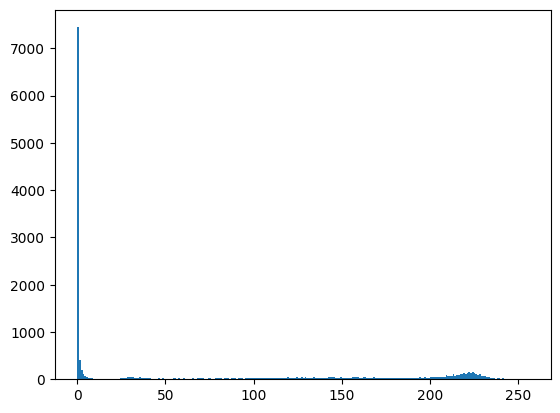

In [11]:
image = io.imread('Non_Demented/non.jpg')

if len(image.shape) == 2:  # Check if it's already grayscale
  gray_image = image
else:
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.hist(gray_image.ravel(), bins=256, range=[0, 256])
plt.show()

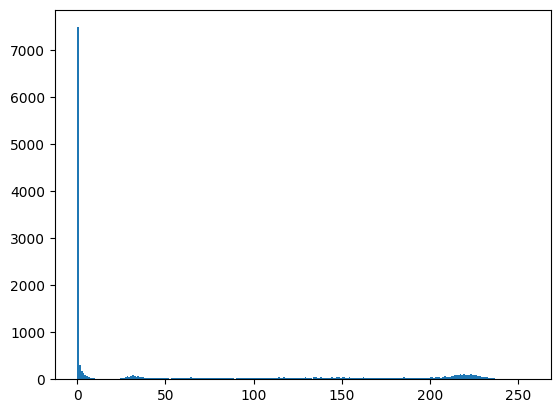

In [12]:
image = io.imread('Very_Mild_Demented/verymild.jpg')

if len(image.shape) == 2:  # Check if it's already grayscale
  gray_image = image
else:
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.hist(gray_image.ravel(), bins=256, range=[0, 256])
plt.show()

In [13]:
import cv2
import os
import glob
import numpy as np

# Defina o diretório das pastas das duas classes

# Função para carregar imagens em escala de cinza e redimensionar, se necessário
def calcular_histograma(imagem):
  hist = cv2.calcHist([imagem], [0], None, [256], [0, 256])
  return hist.flatten()

# Listar imagens da classe A e carregar em escala de cinza
imagens_classe_A = glob.glob(os.path.join(diretorio_classe_A, "*.jpg"))
dados_classe_A = []
rotulos_classe_A = []

for imagem_path in imagens_classe_A:
  img = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
  hist = calcular_histograma(img)
  dados_classe_A.append(hist)
  rotulos_classe_A.append(0)  # Rotular como classe 0

# Listar imagens da classe B e carregar em escala de cinza
imagens_classe_B = glob.glob(os.path.join(diretorio_classe_B, "*.jpg"))
dados_classe_B = []
rotulos_classe_B = []

for imagem_path in imagens_classe_B:
  img = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
  hist = calcular_histograma(img)
  dados_classe_B.append(hist)
  rotulos_classe_B.append(1)  # Rotular como classe 1

# Concatenar os dados e rótulos das duas classes
dados = np.vstack([dados_classe_A, dados_classe_B])
rotulos = np.array(rotulos_classe_A + rotulos_classe_B)

In [14]:
dados.shape

(4480, 256)

## ResNet

In [15]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable

model = models.resnet18(pretrained=True)

layer = model._modules.get('avgpool')
model.eval()

scaler = transforms.Resize((224, 224))

#normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


In [16]:
import numpy as np

def gerar_embeddings(arquivo_imagem):


  img = Image.open(arquivo_imagem).convert('RGB')
  #img_transformada = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
  img_transformada = Variable(to_tensor(scaler(img)).unsqueeze(0))

  embedding = torch.zeros(512) # armazenado espaço

  def capturar_embedding(m, i, o):
      embedding.copy_(o.data.reshape(o.data.size(1)))

  # capturando embeddings
  h = layer.register_forward_hook(capturar_embedding)
  model(img_transformada)

  h.remove()

  return np.array(embedding)

In [17]:
imagens_classe_A = glob.glob(os.path.join(diretorio_classe_A, "*.jpg"))
imagens_classe_B = glob.glob(os.path.join(diretorio_classe_B, "*.jpg"))

# Listas para armazenar embeddings e rótulos
embeddings = []
rotulos = []

# Gerar embeddings para as imagens da classe A
for imagem_path in imagens_classe_A:
  embedding = gerar_embeddings(imagem_path)
  embeddings.append(embedding)
  rotulos.append(0)  # Rotular como classe 0 (Classe A)

# Gerar embeddings para as imagens da classe B
for imagem_path in imagens_classe_B:
  embedding = gerar_embeddings(imagem_path)
  embeddings.append(embedding)
  rotulos.append(1)  # Rotular como classe 1 (Classe B)

# Converter listas em arrays numpy
embeddings = np.vstack(embeddings)
rotulos = np.array(rotulos)

In [18]:
embeddings.shape

(4480, 512)

# 2.3 Extração de Padrões - Classificação

In [19]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Histograma de Cores

In [20]:
# Dividir o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
dados_treinamento1, dados_teste1, rotulos_treinamento1, rotulos_teste1 = train_test_split(
    dados, rotulos, test_size=0.3, random_state=42)

# Inicializar a MLP
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinar a MLP
mlp1.fit(dados_treinamento1, rotulos_treinamento1)

MLPClassifier(max_iter=1000, random_state=42)

## ResNet

In [21]:
# Dividir o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
dados_treinamento2, dados_teste2, rotulos_treinamento2, rotulos_teste2 = train_test_split(
    embeddings, rotulos, test_size=0.3, random_state=42)

# Inicializar a MLP
mlp2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinar a MLP
mlp2.fit(dados_treinamento2, rotulos_treinamento2)

MLPClassifier(max_iter=1000, random_state=42)

# 2.4 Pós-Processamento

Para avaliar o desempenho dos classificadores criados anteriormente, utilizaremos métricas de avaliação, com ênfase no F1-score (comumente usado para dados médicos) e na acurácia. Além disso, faremos uso da matriz de confusão.

## Histograma de Cores

In [22]:
# Prever as classes das imagens de teste
predicoes1 = mlp1.predict(dados_teste1)

# Calcular o F1-score
f11 = f1_score(rotulos_teste1, predicoes1)
acc1 = accuracy_score(rotulos_teste1, predicoes1)

# Imprimir o relatório de classificação (incluindo precisão, recall e F1-score)
relatorio1 = classification_report(rotulos_teste1, predicoes1, target_names=["Non_Demented", "Very_Mild_Demented"])
print("Relatório de Classificação:")
print(relatorio1)

print(f"F1-score: {f11:.2f}")
print(f"Acurácia: {acc1:.2f}")

Relatório de Classificação:
                    precision    recall  f1-score   support

      Non_Demented       0.59      0.85      0.69       689
Very_Mild_Demented       0.70      0.36      0.48       655

          accuracy                           0.62      1344
         macro avg       0.64      0.61      0.59      1344
      weighted avg       0.64      0.62      0.59      1344

F1-score: 0.48
Acurácia: 0.62


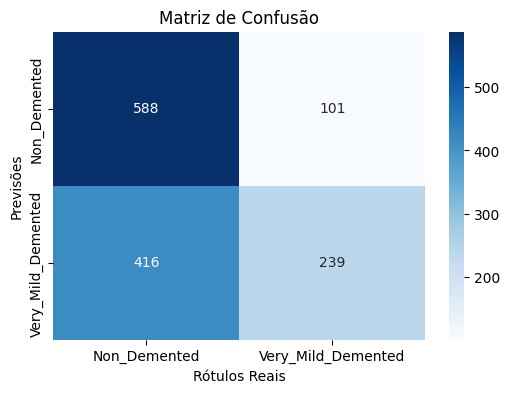

In [23]:
matriz_confusao1 = confusion_matrix(rotulos_teste1, predicoes1)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao1, annot=True, fmt='d', cmap='Blues', xticklabels=["Non_Demented", "Very_Mild_Demented"], yticklabels=["Non_Demented", "Very_Mild_Demented"])
plt.xlabel("Rótulos Reais")
plt.ylabel("Previsões")
plt.title("Matriz de Confusão")
plt.show()

## ResNet

In [24]:
# Prever as classes das imagens de teste
predicoes2 = mlp2.predict(dados_teste2)

# Calcular o F1-score
f12 = f1_score(rotulos_teste2, predicoes2)
acc2 = accuracy_score(rotulos_teste2, predicoes2)

# Imprimir o relatório de classificação (incluindo precisão, recall e F1-score)
relatorio2 = classification_report(rotulos_teste2, predicoes2, target_names=["Non_Demented", "Very_Mild_Demented"])
print("Relatório de Classificação:")
print(relatorio2)

print(f"F1-score: {f12:.2f}")
print(f"Acurácia: {acc2:.2f}")

Relatório de Classificação:
                    precision    recall  f1-score   support

      Non_Demented       0.85      0.90      0.87       689
Very_Mild_Demented       0.88      0.83      0.85       655

          accuracy                           0.86      1344
         macro avg       0.86      0.86      0.86      1344
      weighted avg       0.86      0.86      0.86      1344

F1-score: 0.85
Acurácia: 0.86


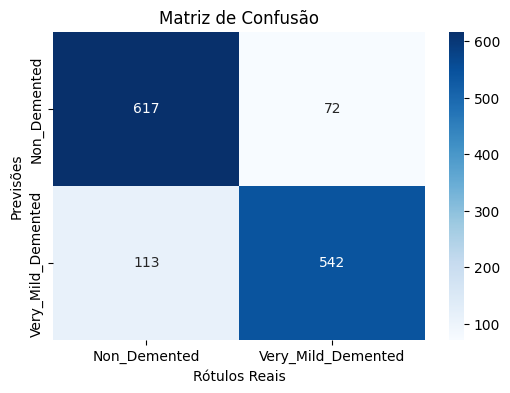

In [25]:
matriz_confusao2 = confusion_matrix(rotulos_teste2, predicoes2)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao2, annot=True, fmt='d', cmap='Blues', xticklabels=["Non_Demented", "Very_Mild_Demented"], yticklabels=["Non_Demented", "Very_Mild_Demented"])
plt.xlabel("Rótulos Reais")
plt.ylabel("Previsões")
plt.title("Matriz de Confusão")
plt.show()

# 2.5 Uso do Conhecimento

É possível classificar os dados, distinguindo entre ausência de demência e estágio inicial de demência. Isso pode desempenhar um papel crucial na detecção precoce da doença, permitindo o acesso a tratamentos que podem retardar a progressão da demência. Além disso, a implementação de mecanismos auxiliares no diagnóstico tem demonstrado grande utilidade, especialmente em um contexto de recursos hospitalares limitados, além de contribuir para a redução de erros médicos.